# Práctica 2.2 - Perceptrón Multicapa

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import Dense as ds
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) #Datos de entrada
salidas = np.array([[0],[1],[1],[0]]) # Datos de salida

#### Este es el esquema básico que seguiremos a la hora de crear una red MLP.
#### Primero se instancia el MLP, luego definimos la capa oculta y la capa de salida, a continuación configuramos el método de entrenamiento, agregando como métrica de error el _error cuadrático medio_ y como optimizador _Adam_.
#### Por último, entrenamos la red, obtenemos las predicciones y obtenemos el error.

In [3]:
def Entrenamiento(NeuOc, FuncAc, Epochs): 
    RedN = sq() #Instanciación del MLP
    RedN.add(ds(NeuOc, FuncAc, 2))
    RedN.add(ds(1, FuncAc))
    RedN.compile(loss = "mean_squared_error", optimizer = "Adam") #Configuración del entrenamiento
    RedN.fit(entradas, salidas, epochs = Epochs, verbose = 0) 
    
    Prediccion = RedN.predict(entradas).round()
    Evaluar = RedN.evaluate(entradas, salidas)
    
    return[Prediccion, Evaluar] 

#### Para pintar las gráficas creo una función que llamaré varias veces, el objetivo es mostrar el Error Cuadrático Medio en función de los Epochs

In [4]:
def Pintar(DF, Neurona):
    x = DF[DF['NCapaO']==Neurona]['Epochs'] 
    y = DF[DF['NCapaO']==Neurona]['Error'] 
    plt.plot(x, y) 
    plt.xlabel('Epochs')
    plt.ylabel('Error Cuadrático Medio')
    plt.title('Modelo con {} Neuronas'.format(Neurona))
    plt.show()

In [5]:
DF = pd.DataFrame(columns = ["NCapaO", "Epochs", "FActivacion", "Salida", "Error"]) 
#Dataframe con columnas pedidas en la cuestion de memoria

In [6]:
for NN in range (2, 4): #NN: numero de neuronas
    for epochs in range (2000, 5001, 200): #Saltos de 200 incluyendo el 5000
        Pred, Error = Entrenamiento(NN, "sigmoid", epochs)
        thisdict = { #creo un diccionario para la posterior tabla de contenidos que necesito
            "NCapaO" : NN,
            "Epochs" : epochs,
            "FActivacion" : "Sigmoid",
            "Salida" : Pred,
            "Error" : Error
        }
        Serie = pd.DataFrame([thisdict]) #Transformo a dataframe el diccionario
        DF = pd.concat([DF, Serie])

1/1 [==============================] - 0s 68ms/step - loss: 0.0145


In [7]:
DF.reset_index(drop = True, inplace = True)
DF

,NCapaO,Epochs,FActivacion,Salida,Error
0,2,2000,Sigmoid,"[[0.0], [0.0], [1.0], [1.0]]",0.162167
1,2,2200,Sigmoid,"[[1.0], [1.0], [0.0], [0.0]]",0.250113
2,2,2400,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.099702
3,2,2600,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.188782
4,2,2800,Sigmoid,"[[0.0], [1.0], [1.0], [1.0]]",0.207005
5,2,3000,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.157433
6,2,3200,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.034905
7,2,3400,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.077260
8,2,3600,Sigmoid,"[[0.0], [1.0], [1.0], [0.0]]",0.080100
9,2,3800,Sigmoid,"[[0.0], [1.0], [1.0], [1.0]]",0.175141


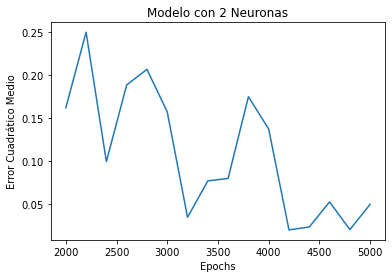

In [8]:
Pintar(DF, 2)

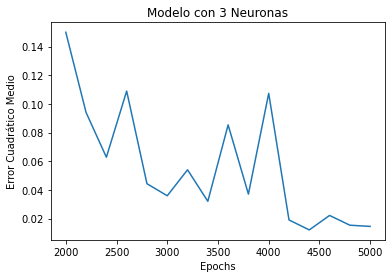

In [9]:
Pintar(DF, 3)

In [18]:
DF2 = pd.DataFrame(columns = ["NCapaO", "Epochs", "FActivacion", "Salida", "Error"])

In [19]:
for NN in range (2, 4):
    for epochs in range (2000, 5001, 250):
        Pred, Error = Entrenamiento(NN, "relu", epochs)
        thisdict2 = {
            "NCapaO" : NN,
            "Epochs" : epochs,
            "FActivacion" : "ReLU",
            "Salida" : Pred,
            "Error" : Error
        }
        Serie2 = pd.DataFrame([thisdict2])
        DF2 = pd.concat([DF2, Serie2])

1/1 [==============================] - 0s 63ms/step - loss: 9.8528e-13


In [23]:
DF2.reset_index(drop = True, inplace = True)
DF2

,NCapaO,Epochs,FActivacion,Salida,Error
0,2,2000,ReLU,"[[0.0], [0.0], [0.0], [0.0]]",5.000000e-01
1,2,2250,ReLU,"[[0.0], [0.0], [0.0], [0.0]]",5.000000e-01
2,2,2500,ReLU,"[[0.0], [1.0], [1.0], [0.0]]",1.031411e-12
3,2,2750,ReLU,"[[0.0], [1.0], [1.0], [0.0]]",7.027753e-07
4,2,3000,ReLU,"[[0.0], [0.0], [0.0], [0.0]]",5.000000e-01
5,2,3250,ReLU,"[[0.0], [1.0], [0.0], [0.0]]",1.666667e-01
6,2,3500,ReLU,"[[0.0], [0.0], [0.0], [0.0]]",5.000000e-01
7,2,3750,ReLU,"[[0.0], [0.0], [0.0], [0.0]]",5.000000e-01
8,2,4000,ReLU,"[[0.0], [0.0], [1.0], [0.0]]",2.500000e-01
9,2,4250,ReLU,"[[0.0], [0.0], [0.0], [1.0]]",2.500000e-01


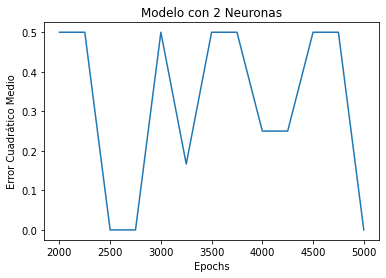

In [24]:
Pintar(DF2, 2)

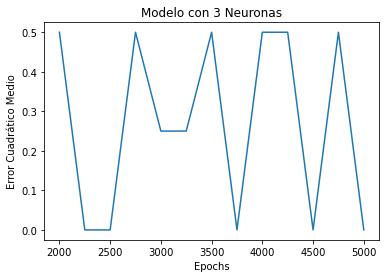

In [22]:
Pintar(DF2, 3)